#### **Por que escolhi esse dataset? 📚** 

##### Escolhi utilizar o dataset _skoob.csv_ (encontrado no _Kaggle_) pois, além do _Skoob_ ser um aplicativo que uso frequentemente, buscava um set sobre livros que me permitisse acessar dados mais específicos (como avaliações, editoras, nº de páginas, etc) que de certa forma fossem voltados para a literatura brasileira, como é o caso do analisado.

**OBS:** nas análises que utilizam os registros sobre anos, limitei os dados até 2020, visto que eles possuem poucos dados depois dessa data por falta de atualizações.

#### **Gerando um database a partir do arquivo 'skoob.csv' 📌**

In [1]:
#Importando as bibliotecas a serem usadas

import csv
import sqlite3

In [2]:
#Atribuindo a abertura do arquivo .csv à variável 'file' 

file = open('skoob.csv', encoding='utf-8')

In [3]:
#Atribuindo a leitura do arquivo .csv à variável 'conteudo'

conteudo = csv.reader(file)

In [4]:
#Conectando o código ao banco de dados (que, como não existe, será criado) através de variável 'conn' 

conn = sqlite3.connect('skoob_database.db')

In [5]:
#Gerando um cursor para executar os comandos SQL e atribuindo-oà variável 'cursor' 

cursor = conn.cursor()

In [ ]:
#Criando a tabela 'books'

cursor.execute('''CREATE TABLE IF NOT EXISTS books(
               titulo TEXT,
               autor TEXT,
               ISBN_13 INTEGER,
               ISBN_10 INTEGER,
               ano INTEGER,
               paginas INTEGER,
               idioma TEXT,
               editora TEXT,
               rating FLOAT,
               avaliacao INTEGER,
               resenha INTEGER,
               abandonos INTEGER,
               relendo INTEGER,
               querem_ler INTEGER,
               lendo INTEGER,
               leram INTEGER,
               descricao TEXT,
               genero TEXT,
               male INTEGER,
               female INTEGER
)''')

In [7]:
#Atribuindo o comando de inserção de dados à variável 'inserir_dados' 

inserir_dados = 'INSERT INTO books(titulo,autor,ISBN_13,ISBN_10,ano,paginas,idioma,editora,rating,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram,descricao,genero,male,female) VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)'

In [ ]:
#Inserindo de fato os dados do arquivo .csv ao database

cursor.executemany(inserir_dados, conteudo)

In [9]:
#Atribuindo o comando de seleção de dados à variável 'selecionar_tudo' 

selecionar_tudo = 'SELECT * FROM books'

In [10]:
#Atribuindo a lista de registros à variável 'registros' 

registros = cursor.execute(selecionar_tudo).fetchall()

In [ ]:
#Percorrendo a lista de registros e percorrendo-os um a um

for registro in registros:
    print(registro)

In [12]:
#Commitando as alterações

conn.commit()

In [13]:
#Encerrando a conexão

conn.close()

#### **Análise dos dados através do uso das bibliotecas pandas, numpy e matplotlib 📊**

In [2]:
#Importando as bibliotecas a serem usadas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Atribuindo a leitura do arquivo .csv à variável 'df_skoob' 

df_skoob = pd.read_csv('skoob.csv', encoding='utf-8', on_bad_lines='skip')

In [3]:
#Excluindo registros duplicados

df_skoob = df_skoob.drop_duplicates()

In [4]:
#Visualizando o dataframe

df_skoob

,titulo,autor,ISBN_13,ISBN_10,ano,paginas,idioma,editora,rating,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram,descricao,genero,male,female
0,Orçamento sem falhas,Nath Finanças,9.786556e+12,6555601566,2021,128,português,Intrínseca,0.0,0,0,0,0,1,0,0,"Quando o assunto é dinheiro, não dá para achar...","Economia, Finanças / Literatura Brasileira / N...",28,72
1,Minha Sombria Vanessa,Kate Elizabeth Russell,9.788551e+12,8551006274,2020,432,português,Intrínseca,4.3,2,653,48,3,6,389,2,Elogiado por Gillian Flynn e considerado um do...,Drama / Ficção / Literatura Estrangeira / Susp...,7,93
2,Recursão,Blake Crouch,9.788551e+12,8551005375,2020,320,português,Intrínseca,4.4,2,618,22,2,6,295,2,E se um dia memórias vívidas de coisas que nun...,Ficção / Ficção científica / Literatura Estran...,21,79
3,"M, o Filho do Século",Antonio Scurati,9.788551e+12,855100607X,2020,816,português,Intrínseca,4.6,60,12,1,0,951,49,55,"O romance M, o Filho do Século conta em trama ...","Biografia, Autobiografia, Memórias / História ...",37,63
4,Oblivion Song: Entre Dois Mundos,Robert Kirkman,9.788551e+12,8551006258,2020,136,português,Intrínseca,4.1,166,16,0,0,376,6,184,Mestre em traçar universos distópicos permeado...,"Ficção / HQ, comics, mangá / Literatura Estran...",44,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11970,Poemas completos de Alberto Caeiro,Fernando Pessoa,9.788572e+12,8572324704,2007,208,português,Martin,4.2,1,27,46,18,552,89,3,"Nos Poemas Completos de Alberto Caeiro (1946),...","Literatura Estrangeira / Poemas, poesias",33,67
11971,Poesia de Álvaro de Campos,Fernando Pessoa,9.798572e+12,857232707X,2007,600,português,Martin,4.6,99,2,4,3,50,2,222,"Cerebral e retraído, Fernando Pessoa concebeu ...",Ficção / Literatura Brasileira,47,53
11972,Ben-Hur,Lewis Wallace,9.788572e+12,8572326359,2006,528,português,Martin,4.0,731,28,30,2,980,99,1,"O romance épico ""Ben-Hur - Uma História dos Te...",Aventura / Cinema / Crime / Crônicas / Drama /...,44,56
11973,Folhas de Relva,Walt Whitman,9.788572e+12,8572324364,2005,575,português,Martin,4.4,471,18,34,4,1,130,855,Walt Whitman é considerado pela crítica mundia...,"Literatura Estrangeira / Poemas, poesias",41,59


In [5]:
#Criando um backup para eventuais necessidades

df_backup = df_skoob

In [6]:
#Checando a quantidade de valores vazios em cada coluna para eventual necessidade de tratamento

df_skoob.isnull().sum()

titulo          0
autor           4
ISBN_13       758
ISBN_10       758
ano             0
paginas         0
idioma          2
editora         1
rating          0
avaliacao       0
resenha         0
abandonos       0
relendo         0
querem_ler      0
lendo           0
leram           0
descricao     655
genero        587
male            0
female          0
dtype: int64

Text(0.5, 1.0, 'Variação da quantidade média de páginas dos livros ao longo dos anos (a partir de 1900)')

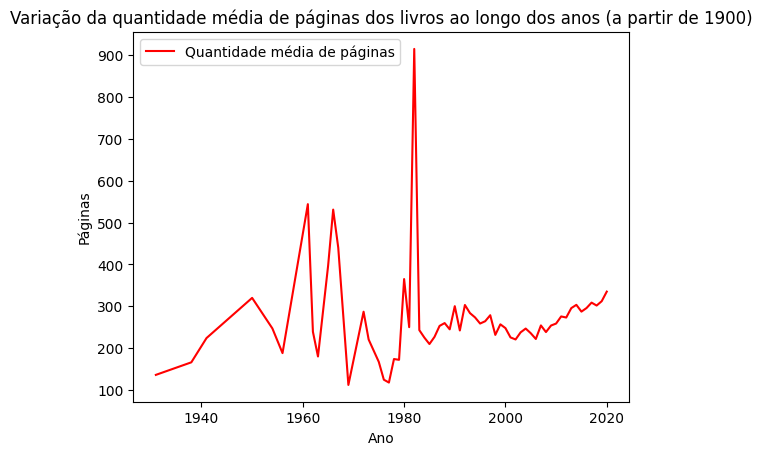

In [4]:
#Gráfico 01

df01 = df_skoob[(df_skoob['ano'] >= 1900) & (df_skoob['ano'] <= 2020)]

paginas_ano = df01.groupby('ano')['paginas'].mean() 

plt.plot(paginas_ano, label='Quantidade média de páginas', color='red')
plt.legend()
plt.xlabel('Ano')
plt.ylabel('Páginas')
plt.title('Variação da quantidade média de páginas dos livros ao longo dos anos (a partir de 1900)')

Text(0.5, 1.0, 'Variação da média das avaliações dos produzidos a partir de 1900')

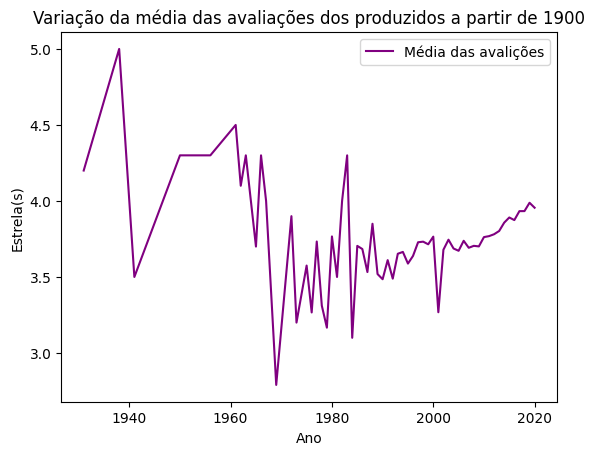

In [6]:
#Gráfico 02

avaliacao_ano = df01.groupby('ano')['rating'].mean()

plt.plot(avaliacao_ano, label='Média das avalições', color='purple')
plt.legend()
plt.xlabel('Ano')
plt.ylabel('Estrela(s)')
plt.title('Variação da média das avaliações dos produzidos a partir de 1900')

Text(0.5, 1.0, 'Quantidade de livros publicados por ano nos últimos 20 anos')

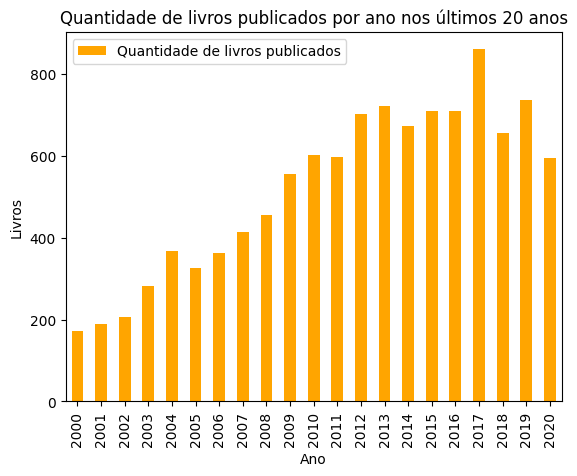

In [12]:
#Gráfico 03

df03 = df_skoob[(df_skoob['ano'] >= 2000) & (df_skoob['ano'] <= 2020)]

livros_ano = df03.groupby('ano')['titulo'].count()

livros_ano.plot(kind='bar', color='orange',label='Quantidade de livros publicados')
plt.xlabel('Ano')
plt.ylabel('Livros')
plt.legend()
plt.title('Quantidade de livros publicados por ano nos últimos 20 anos')

Text(0.5, 1.0, 'Quantidade de livros por editora cadastrados no Skoob')

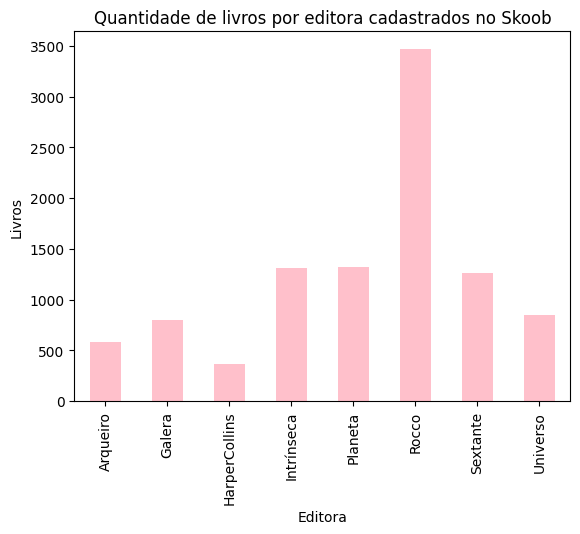

In [7]:
#Gráfico 04

df03 = df_skoob[df_skoob['editora'].isin(['Intrínseca', 'HarperCollins', 'Galera', 'Rocco', 'Sextante', 'Arqueiro', 'Planeta', 'HarperCollins', 'Universo'])]

livros_editora = df03.groupby('editora')['titulo'].count()

livros_editora.plot(kind='bar', color='pink')
plt.xlabel('Editora')
plt.ylabel('Livros')
plt.title('Quantidade de livros por editora cadastrados no Skoob')

Text(0.5, 1.0, 'Quantidade de romances cadastrados no Skoob publicados por cada editora')

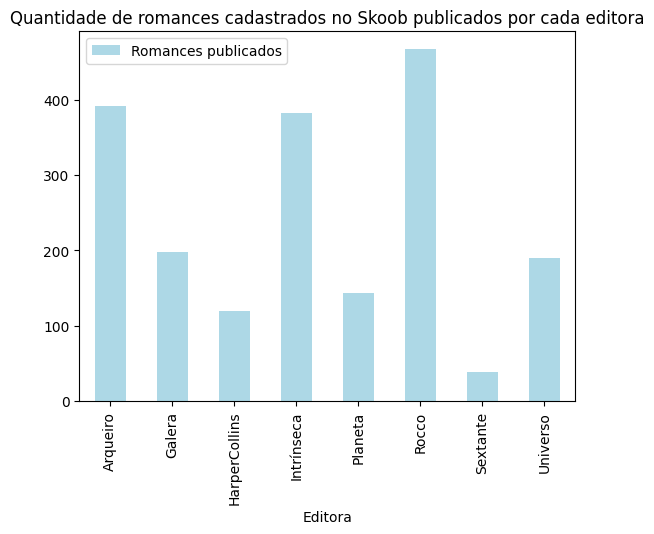

In [9]:
#Gráfico 05

df05 = df03
df05 = df05.dropna(subset='genero')
df05 = df05[df05['genero'].str.contains('Romance')]

romances_editora = df05.groupby('editora')['titulo'].count()

romances_editora.plot(kind='bar', color='lightblue', label='Romances publicados')
plt.legend()
plt.xlabel('Editora')
plt.title('Quantidade de romances cadastrados no Skoob publicados por cada editora')